# Case Study by: Mohammed Saqlain Attar

## 1.Load the data from “glass.csv” and make a bar plot of different types of glasses.

In [1]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [24]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [22]:
import seaborn as sns

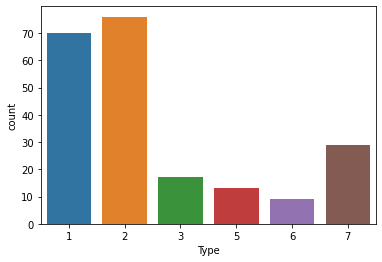

In [23]:
sns.countplot(df['Type'])

## 2.Make a train_test split and fit a single decision tree classifier.

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [41]:
X = df.drop(columns='Type')
y = df['Type']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [43]:
model_tree = DecisionTreeClassifier()

In [44]:
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = model_tree.predict(x_test)

In [56]:
y_pred

array([1, 1, 5, 3, 1, 2, 3, 5, 3, 2, 3, 2, 1, 7, 2, 2, 5, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 5, 1, 6, 2, 5, 1, 7, 2, 7, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 7, 1, 2, 1, 2, 1, 1, 7, 5, 5, 1, 1, 2, 7, 1, 3, 1, 5],
      dtype=int64)

In [46]:
metrics.accuracy_score(y_test, y_pred)

0.49230769230769234

In [47]:
metrics.confusion_matrix(y_test,y_pred)

array([[11,  9,  3,  0,  1,  1],
       [ 5, 10,  0,  2,  0,  0],
       [ 3,  1,  3,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 1,  2,  0,  0,  0,  5]], dtype=int64)

In [49]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.55      0.44      0.49        25
           2       0.42      0.59      0.49        17
           3       0.50      0.43      0.46         7
           5       0.38      0.75      0.50         4
           6       0.00      0.00      0.00         4
           7       0.83      0.62      0.71         8

    accuracy                           0.49        65
   macro avg       0.45      0.47      0.44        65
weighted avg       0.50      0.49      0.48        65



## 3.Make a k-fold split with 3 splits and measure the accuracy score with each split[Hint:Refer to KFold module under sklearn’s model selection.]

In [64]:
cross_val_score(model_tree,X,y,cv=3, scoring='accuracy')

array([0.61111111, 0.66197183, 0.49295775])

In [65]:
cross_val_score(model_tree,X,y,cv=3, scoring='accuracy').mean()

0.5745957224830465

## 4.Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer alongwith a 10-fold cross validation.[Hint:Define a range of estimators and feed in range as param_grid]

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier()

In [77]:
param_grid = dict(n_estimators=np.arange(50,550,50),
                  criterion=['gini','entropy'],
                  max_depth=np.arange(2,15),
                  max_features=['auto','sqrt','log2'])

grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, n_jobs=-1, cv=5)
grid_search.fit(X,y)
print(grid_search)

print('Best Score:',grid_search.best_score_)
print('Best Estimator:',grid_search.best_estimator_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])})
Best Score: 0.7387596899224806
Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=350)


In [79]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 350}


In [87]:
grid_search.predict(x_test)

array([3, 2, 2, 3, 1, 2, 1, 5, 1, 3, 1, 2, 1, 7, 1, 2, 6, 3, 1, 2, 1, 2,
       6, 2, 2, 5, 2, 1, 1, 5, 1, 1, 2, 2, 1, 7, 1, 7, 2, 7, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 7, 2, 7, 3, 1, 7, 6, 5, 1, 1, 2, 7, 3, 3, 2, 6],
      dtype=int64)

In [80]:
rf_model = RandomForestClassifier(**grid_search.best_params_)

In [81]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=350)

In [82]:
rf_model_pred = rf_model.predict(x_test)

In [83]:
metrics.accuracy_score(y_test, rf_model_pred)

0.6

In [86]:
cross_val_score(rf_model, X, y, cv=5).mean()

0.7106312292358805